<a href="https://colab.research.google.com/github/Christina-26/Marvel-Level--2-Task/blob/main/image_classificationipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **K-means clustering**
 is an unsupervised learning algorithm which aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest centroid. The algorithm aims to minimize the squared Euclidean distances between the observation and the centroid of cluster to which it belongs.**

K-Means clustering is not limited to the consumer information and population scientist. It can be used for Imagery analysis as well. Here we would use K-Means clustering to classify images of MNIST dataset.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Accuracy Score: 0.0766
Number of clusters is 256
Inertia : 1508114.5
Homogeneity : 0.8443438407149633


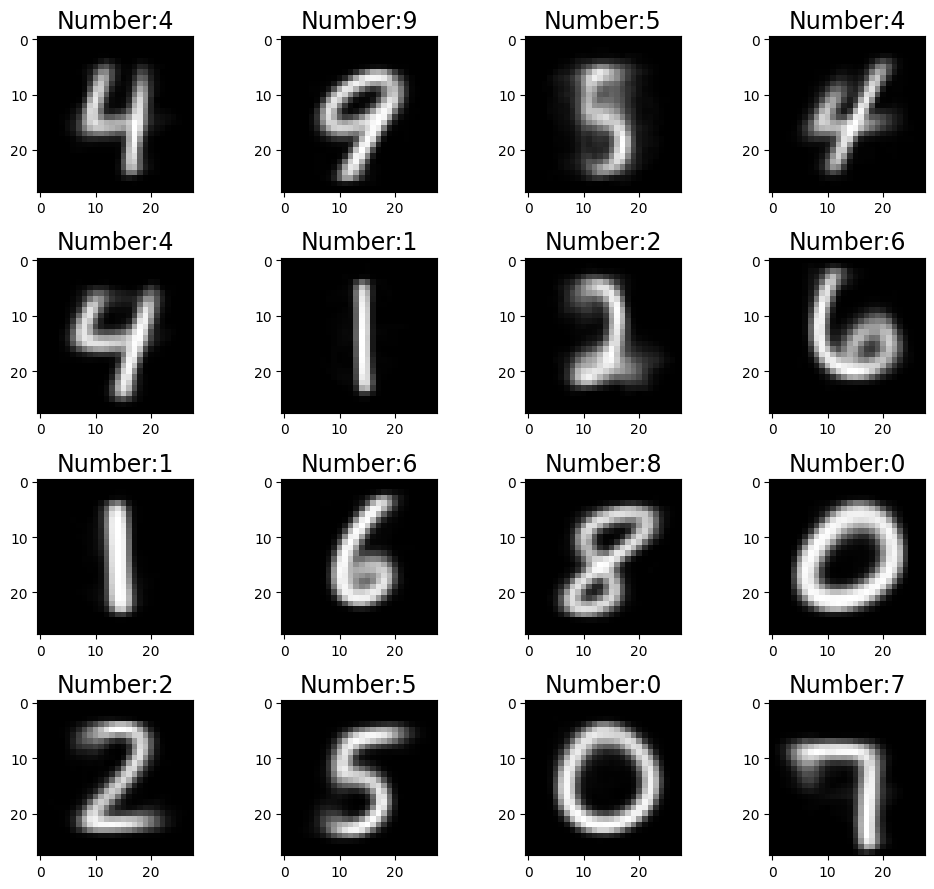

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import accuracy_score
from sklearn import metrics

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape and normalize the input data
x_train = x_train.reshape(60000, 28 * 28).astype('float32') / 255.0
x_test = x_test.reshape(10000, 28 * 28).astype('float32') / 255.0

# Initialize and fit MiniBatchKMeans model
kmeans = MiniBatchKMeans(n_clusters=256)
kmeans.fit(x_train)

# Function to retrieve number labels associated with cluster labels
def retrieve_info(cluster_labels, y_train):
    reference_labels = {}
    for i in range(len(np.unique(kmeans.labels_))):
        index = np.where(cluster_labels == i, 1, 0)
        num = np.bincount(y_train[index == 1]).argmax()
        reference_labels[i] = num
    return reference_labels

# Retrieve information and number labels
reference_labels = retrieve_info(kmeans.labels_, y_train)
number_labels = np.random.rand(len(kmeans.labels_))
for i in range(len(kmeans.labels_)):
    number_labels[i] = reference_labels[kmeans.labels_[i]]

# Predict cluster labels for testing set
predicted_cluster = kmeans.predict(x_test)

# Retrieve number labels for predicted clusters
predicted_number_labels = number_labels[predicted_cluster]

# Calculate accuracy score
accuracy = accuracy_score(predicted_number_labels, y_test)

# Display accuracy score
print("Accuracy Score:", accuracy)

# Function to calculate metrics for the model
def calculate_metrics(model, output):
    print('Number of clusters is {}'.format(model.n_clusters))
    print('Inertia : {}'.format(model.inertia_))
    print('Homogeneity : {}'.format(metrics.homogeneity_score(output, model.labels_)))

# Calculate metrics for the model
calculate_metrics(kmeans, y_train)

# Plotting the cluster centroids
centroids = kmeans.cluster_centers_.reshape(256, 28, 28) * 255.0

plt.figure(figsize=(10, 9))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.title('Number:{}'.format(reference_labels[i]), fontsize=17)
    plt.imshow(centroids[i], cmap='gray')

plt.tight_layout()
plt.show()

